# Autoencoder sencillo
Iniciaremos construyendo el autoencoder más sencillo. Usaremos una red neuronal de una capa como encoder y otra como decoder.


In [13]:
from keras.layers import Input, Dense
from keras.models import Model

# Este es el tamaño de nuestra representación codificada
encoding_dim = 32  # 32 enteros -> factor de compresión de 24.5 para imágenes de 784 pixeles

# input placeholder
input_img = Input(shape=(784,))

# "encoded" es la representación codificada de la entrada
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" es la reconstrucción de la entrada
decoded = Dense(784, activation='sigmoid')(encoded)

# el modelo mapea una entrada a su reconstrucción
autoencoder = Model(input_img, decoded)

Haremos un encoder separado

In [14]:
# este modelo codifica
encoder = Model(input_img, encoded)

Decoder

In [15]:
# placeholder para input de 32 dimensiones
encoded_input = Input(shape=(encoding_dim, ))

# sacamos la última capa del modelo autoencoder
decoder_layer = autoencoder.layers[-1]

# creamos modelo del decoder
decoder = Model(encoded_input, decoder_layer(encoded_input))

Ahora vamos a entrenarlo con los dígitos de MNIST. 

Primero, cnfigurameos el modelo para usar binary cross entropy y Adadelta.

In [16]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Preparamos la información de entrada. Estamos utilizando dígitos de MNIST. Como sólo nos interesa hacer el encoding/decoding, no necesitamos los labels. No es parte de este problema.

También normalizamos todos los valores para que estén entre 0 y 1. También aplanamos las imágenes de 28x28 a vectores de 784.

In [19]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [20]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Ahora podemos entrenar nuestro modelo 50 epochs:

In [21]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.3599 - val_loss: 0.2710
Epoch 2/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.2643 - val_loss: 0.2536
Epoch 3/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.2419 - val_loss: 0.2274
Epoch 4/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.2192 - val_loss: 0.2088
Epoch 5/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2040 - val_loss: 0.1964
Epoch 6/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.1935 - val_loss: 0.1876
Epoch 7/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1855 - val_loss: 0.1806
Epoch 8/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.1790 - val_loss: 0.1745
Epoch 9/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1732 - val_loss: 0.1692
Epoch

Después de 50 epochs, el autoenocder parece llegar a un punto estable. En las siguientes celdas vamos a visualizar las imágenes y la reconstrucción. Como se puede ver, se pierde info.

In [22]:
# codificamos
encoded_imgs = encoder.predict(x_test)

# decodificamos
decoded_imgs = decoder.predict(encoded_imgs)

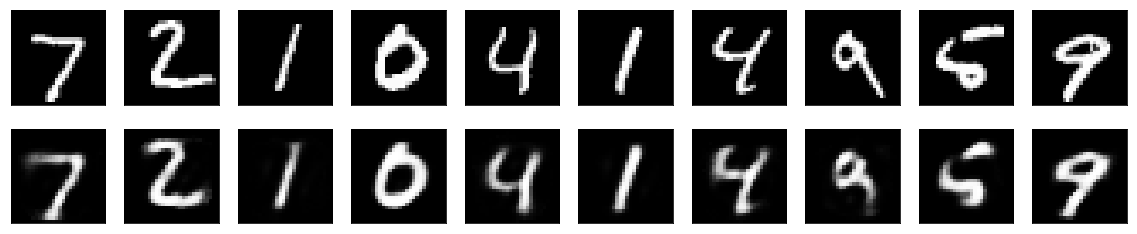

In [23]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep Autoencoder
No tenemos que limitarnos a encoders y decoders de una capa, podemos hacerlos profundos.

In [24]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [25]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.3538 - val_loss: 0.2633
Epoch 2/100
60000/60000 [==============================] - 8s 138us/step - loss: 0.2572 - val_loss: 0.2497
Epoch 3/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.2431 - val_loss: 0.2377
Epoch 4/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.2298 - val_loss: 0.2191
Epoch 5/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.2140 - val_loss: 0.2065
Epoch 6/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.2020 - val_loss: 0.1942
Epoch 7/100
60000/60000 [==============================] - 8s 127us/step - loss: 0.1912 - val_loss: 0.1873
Epoch 8/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1850 - val_loss: 0.1815
Epoch 9/100
60000/60000 [==============================] - 8s 140us/step - loss: 0.1799 - val_

60000/60000 [==============================] - 11s 176us/step - loss: 0.1072 - val_loss: 0.1059
Epoch 77/100
60000/60000 [==============================] - 10s 171us/step - loss: 0.1071 - val_loss: 0.1062
Epoch 78/100
60000/60000 [==============================] - 10s 175us/step - loss: 0.1068 - val_loss: 0.1048
Epoch 79/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.1064 - val_loss: 0.1059
Epoch 80/100
60000/60000 [==============================] - 10s 172us/step - loss: 0.1065 - val_loss: 0.1066
Epoch 81/100
60000/60000 [==============================] - 10s 169us/step - loss: 0.1059 - val_loss: 0.1038
Epoch 82/100
60000/60000 [==============================] - 10s 167us/step - loss: 0.1058 - val_loss: 0.1055
Epoch 83/100
60000/60000 [==============================] - 10s 175us/step - loss: 0.1055 - val_loss: 0.1026
Epoch 84/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.1055 - val_loss: 0.1028
Epoch 85/100
60000/60000 [=======

In [26]:
# codificamos
encoded_imgs = encoder.predict(x_test)

# decodificamos
decoded_imgs = decoder.predict(encoded_imgs)

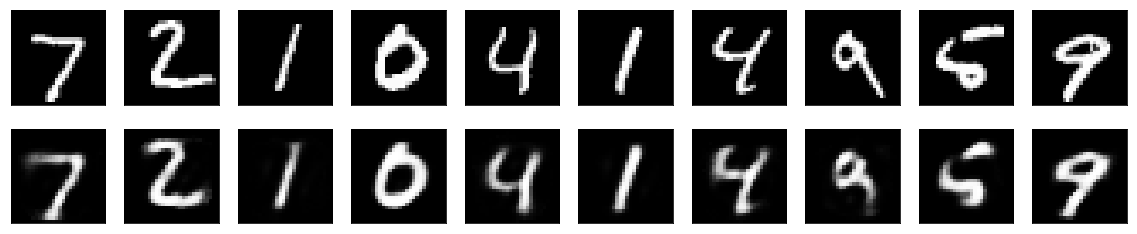

In [27]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoder

Como nuestro input son imágenes, tiene sentido usar CNNs como encoders y decoders. En ambientes prácticos, cualquier autoencoder aplicado en imágenes es convolucional.

decoder: Será una serie de capas Conv2D y MaxPooling2D. MaxPooling2D hace down-sampling (reduce dimensiones).
encoder: Será una serie de Conv2D y UpSampling2D (aumenta dimensiones).

In [28]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# En este punto, la imagen es una representación de (4, 4, 8) - 128 dimensiones

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Cargaremos de vuelta MNIST y usaremos dígitos en la forma (3, 28, 28)

In [30]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [32]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1450 - val_loss: 0.1365
Epoch 2/5
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1355 - val_loss: 0.1402
Epoch 3/5
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1302 - val_loss: 0.1273
Epoch 4/5
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1267 - val_loss: 0.1290
Epoch 5/5
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1237 - val_loss: 0.1243


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# utility function for showing images
def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

input (upper row)
decoded (bottom row)


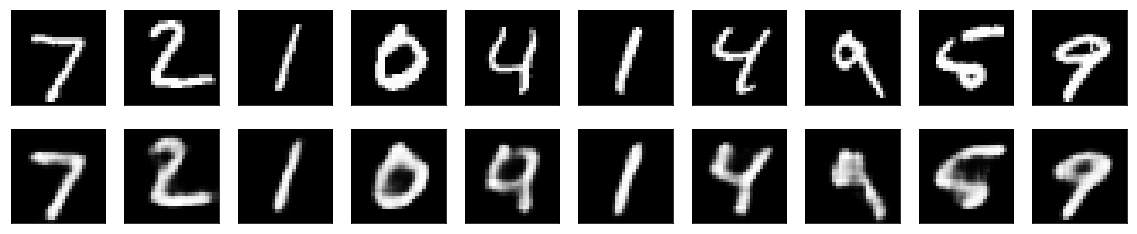

In [37]:
decoded_imgs = autoencoder.predict(x_test)
print("input (upper row)\ndecoded (bottom row)")
show_imgs(x_test, decoded_imgs)

Esta es la representación codificada:

# Denoising

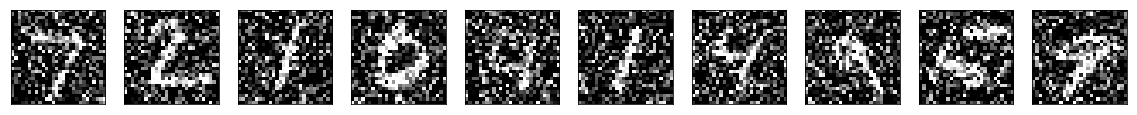

In [40]:
noise_factor = 0.5 
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

show_imgs(x_test_noisy)

In [42]:
# Cambiar a 50 ó 100 epochs
autoencoder.fit(x_train_noisy, x_train, nb_epoch=1, batch_size=128,
                shuffle=True, validation_data=(x_test_noisy, x_test))

/Users/osanseviero/anaconda3/envs/curso-dl/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 130s 2ms/step - loss: 0.1434 - val_loss: 0.1411


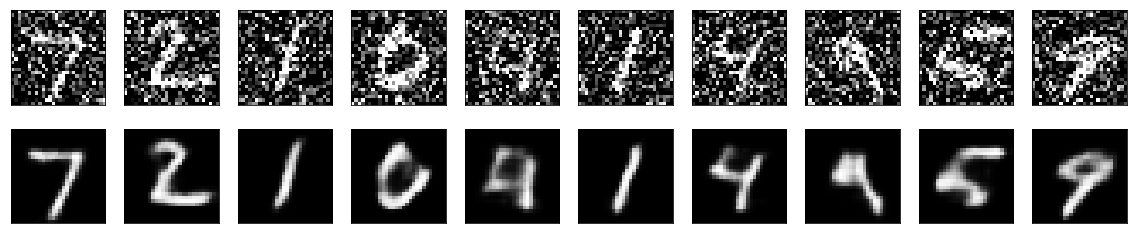

In [43]:
decoded_imgs = autoencoder.predict(x_test_noisy)
show_imgs(x_test_noisy, decoded_imgs)